**Diego Fernando Valle Morales**

**Carné 20003022**

Igorando el sesgo/bias y asumiendo activación sigmoidal implementar la siguiente red neuronal en NumPy

https://gadictos.com/neural-network-pt1/
<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [1]:
import numpy as np

In [2]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

sigmoid(np.array([2,3,4]))

array([0.88079708, 0.95257413, 0.98201379])

In [3]:
Wc1 = np.array([
  [0.9,0.8,0.1],
  [0.3,0.5,0.6],
  [0.2,0.4,0.7]    
])

In [4]:
Wc2 = np.array([0.3,0.5,0.9])

In [5]:
# 4 observaciones, 3 variables
X = np.array([
      [1,0,1],
      [1,2,3],
      [4,5,6],
      [6,7,8],
])

Forward-propagation (inferencia, predicción o estimación)

In [6]:
H = np.matmul(X,Wc1)

In [7]:
X.shape

(4, 3)

In [8]:
Wc1.shape

(3, 3)

In [9]:
H.shape

(4, 3)

In [10]:
A = sigmoid(H)

In [11]:
A

array([[0.75026011, 0.76852478, 0.68997448],
       [0.89090318, 0.95257413, 0.96770454],
       [0.99816706, 0.99969655, 0.9994998 ],
       [0.99988835, 0.99998987, 0.99996957]])

In [12]:
y_aprox = sigmoid(np.matmul(
    A,Wc2
))

In [13]:
y_aprox

array([0.77387413, 0.83403412, 0.84538425, 0.84552612])

In [14]:
def g(X):
  return sigmoid(np.matmul(X,Wc1))

In [15]:
def f(g):
  return sigmoid(np.matmul(g,Wc2))

In [16]:
y_aprox = f(g(X))

In [17]:
y_aprox

array([0.77387413, 0.83403412, 0.84538425, 0.84552612])

ORIENTADO A OBJETOS

In [18]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
        [0.9,0.8,0.1],
        [0.3,0.5,0.6],
        [0.2,0.4,0.7]    
    ])

    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1))
    y_aprox = sigmoid(np.matmul(A,self.Wc2))

    return y_aprox

In [19]:
red = RedNeuronal()
red.forward_propagation(X)

array([0.77387413, 0.83403412, 0.84538425, 0.84552612])

<img src="https://i.imgur.com/IDFRq5a.png">

In [20]:
class RedNeuronal:
  def __init__(self):
    # 1 fila por neurona , 1 columna por variable de entrada
    self.Wc1 = np.array([
        [0.8,0.2],
        [0.4,0.9],
        [0.3,0.5]    
    ])

    # 1 elemento para cada neurona intermedia
    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    print(X.shape)
    print(self.Wc1.T.shape)
    A = sigmoid(np.matmul(X,self.Wc1.T)) # 1 fila por observacion, 1 columna por representacion intermedia [4,3]
    print(A)
    print(A.shape)
    y_aprox = sigmoid(np.matmul(A,self.Wc2)) # 1 fila por observacion,  1 unica salida [4,1]
    print(y_aprox.shape)
    return y_aprox

In [21]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])

In [22]:
red = RedNeuronal()
y_aprox = red.forward_propagation(X)

(4, 2)
(2, 3)
[[0.73105858 0.78583498 0.68997448]
 [0.76852478 0.90024951 0.78583498]
 [0.98522597 0.99776215 0.97587298]
 [0.99797468 0.99983344 0.9950332 ]]
(4, 3)
(4,)


In [23]:
y_aprox

array([0.77438027, 0.80026216, 0.84194007, 0.84485948])

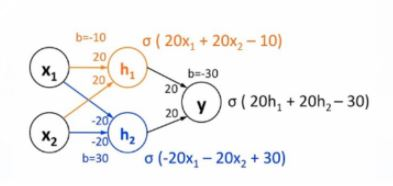

In [58]:
import matplotlib.pyplot as plt

In [63]:
class RedNeuronalXor:
  def __init__(self):
    # 1 fila por neurona , 1 columna por variable de entrada
    self.Wc1 = np.array([
        [20,20],
        [-20,-20]    
    ])

    # 1 elemento para cada neurona intermedia
    self. Wc2  = np.array([20,20])

    self.biasH1=-10
    self.biasH2=30
    self.biasy=-30

  def activacionH1(self, x):
    return (20*x[:,0]+20*x[:,1]-10)
  
  def activacionH2(self, x):
    return (-20*x[:,0]-20*x[:,1]+30)

  def activaciony(self, h1, h2):
    return (20*h1+20*h2-30)

  def forward_propagation(self,X):
    #print(X.shape)
    #print(X)
    #print(self.Wc1.T)
    #print(np.matmul(X,self.Wc1.T))
    #print(np.matmul(X,self.Wc1.T)-self.biasH1)
    h1 = self.activacionH1(np.matmul(X,self.Wc1.T)-self.biasH1) # 1 fila por observacion, 1 columna por representacion intermedia [4,3]
    print("H1")
    print(h1)
    #print(h1.shape)
    #print(self.Wc2.shape)
    h2 = self.activacionH2(np.matmul(X,self.Wc1.T)-self.biasH2) # 1 fila por observacion, 1 columna por representacion intermedia [4,3]
    print("H2")
    print(h2)
    plt.figure(figsize=(16, 4))
    #plt.subplot(1,3,1)
    plt.title("H")
    plt.subplot(1,3,2)
    plt.scatter(h1, h2, marker='*', label='1')
    #plt.scatter(x1[nf], x2[nf], marker='o', label='0')
    plt.legend()

    #print(h2.shape)
    #print(self.Wc2[1])
    y_aprox = self.activaciony(h1*self.Wc2[0]-self.biasy,h2.T*self.Wc2[1]-self.biasy) # 1 fila por observacion,  1 unica salida [4,1]
    #print(y_aprox.shape)
    print(y_aprox)
    return y_aprox

In [51]:
# 4 observaciones, 2 variables
Xxor = np.array([
      [1,1],
      [0,1],
      [0,0],
      [1,0]
])

H1
[390 390 390 390]
H2
[1230 1230 1230 1230]
[649170 649170 649170 649170]


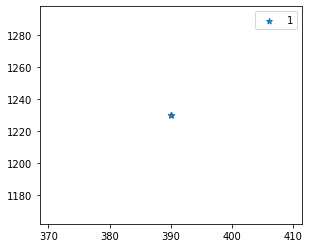

In [64]:
redXor = RedNeuronalXor()
y_aproxXor = redXor.forward_propagation(Xxor)

Se puede observar que en las cuatro posibles combinaciones para la función que se ha obtenido, después de aplicar la operación h1=w1*x-bias1 y aplicar la función de activación, quedan los mismos cuatro valores, al igual que en el caso de h2. por lo que se podría usar otra función de activación.